<a href="https://colab.research.google.com/github/chiyeon01/AI-Study/blob/main/SSD_With_TFHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
import tensorflow_hub as hub

print(tensorflow.__version__)

2.17.0


아래 Pretrained Model을 tensorflow_hub에서 load
<br/>
SSD Pretrained Model in Kaggle : [https://www.kaggle.com/models/tensorflow/ssd-mobilenet-v1](https://www.kaggle.com/models/tensorflow/ssd-mobilenet-v1)
<br/>
Pretrained Model은 COCO Dataset으로 trained 되어있으므로 inference image는 COCO Dataset에서 임의로 가져올 것임.
<br/>
COCO Dataset Site : [https://cocodataset.org/#home](https://cocodataset.org/#home)

In [3]:
ssd_model = hub.load("https://www.kaggle.com/models/tensorflow/ssd-mobilenet-v1/TensorFlow2/fpn-640x640/1")

In [1]:
!mkdir ./data

In [6]:
!wget -O ./data/COCODataset_Val_2017.zip http://images.cocodataset.org/zips/val2017.zip

--2024-08-13 09:34:45--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.98.57, 52.216.213.225, 52.217.118.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.98.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘./data/COCODataset_Val_2017.zip’

./data/COCODataset_ 100%[===================>] 777.80M  65.9MB/s    in 12s     

2024-08-13 09:34:58 (63.1 MB/s) - ‘./data/COCODataset_Val_2017.zip’ saved [815585330/815585330]



In [ ]:
!unzip ./data/COCODataset_Val_2017.zip -d ./data

In [8]:
# np.newaxis를 이용해 차원 늘리기

import cv2
import numpy as np

test_image = cv2.imread('/content/data/val2017/000000000139.jpg')
test_image = test_image[np.newaxis, :, :, :]
result = ssd_model(test_image)

In [9]:
test_image.shape

(1, 426, 640, 3)

In [12]:
type(result)

dict

In [13]:
result

{'detection_anchor_indices': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
 array([[49212., 44285., 44315., 44309., 44501., 17579., 44147., 17543.,
         17941., 49453., 20402., 22696., 46294., 44320., 49500., 44302.,
         49506., 44297., 46294., 44297., 49402., 43127., 18028., 43902.,
         21387., 49507., 18016., 24803., 43853., 44309., 18502., 20415.,
         44087., 19954., 44555., 21899., 50264., 42886., 11860., 43815.,
         49488., 43385., 19950., 43568., 43133., 44290., 45151., 39217.,
         26177., 49512., 43798., 21923., 49495., 49207., 20907., 22696.,
         18493., 43804., 17944., 18515., 43807., 44033., 21407., 20420.,
         20424., 19932., 43121., 49506., 43366., 20457., 20875., 20941.,
         43801., 20424., 17568., 44332., 50137., 49912., 22347., 50017.,
         44061., 43581., 49382., 43822., 19938., 49672., 49276., 44783.,
         49672., 26237., 25721., 19956., 49489., 49792., 42868., 44326.,
         18420., 43825., 49392., 43819.]], dt

In [16]:
result.keys()

dict_keys(['detection_anchor_indices', 'detection_multiclass_scores', 'detection_scores', 'raw_detection_boxes', 'num_detections', 'raw_detection_scores', 'detection_classes', 'detection_boxes'])

In [21]:
#result['detection_anchor_indices']
#result['detection_multiclass_scores']

print('### detection_scores ###')
print(result['detection_scores'])

#result['raw_detection_boxes']

print('### num_detections ###')
print(result['num_detections'])

#result['raw_detection_scores']

print('### detection_classes ###')
print(result['detection_classes'])

# bounding box 좌표는 ymin, xmin, ymax, xmax 순으로 나오므로 주의 필요
# 좌표 값은 원본 Image의 weight, height로 0~1로 정규화 된다.
print('### detection_boxes ###')
print(result['detection_boxes'])

### detection_scores ###
tf.Tensor(
[[0.70796096 0.6537445  0.5561021  0.52041113 0.41075897 0.40710002
  0.40266916 0.36360556 0.34828696 0.33524787 0.33322415 0.32450935
  0.31931114 0.3093416  0.2846617  0.28155142 0.27324164 0.2728184
  0.269739   0.2690043  0.25878045 0.25458828 0.25407577 0.24969105
  0.24259715 0.23966916 0.23718019 0.23597655 0.23039326 0.22803792
  0.22763713 0.22595519 0.22426715 0.22149663 0.22137052 0.22048898
  0.21623273 0.2110242  0.21028541 0.21026637 0.20968722 0.20628357
  0.203154   0.20270444 0.19880359 0.19857739 0.19687662 0.19638938
  0.1963114  0.19264932 0.19134843 0.18822697 0.18771972 0.18605919
  0.18522954 0.18514946 0.18425983 0.18248716 0.18077716 0.17917195
  0.17892665 0.1770504  0.17628376 0.17615157 0.17399226 0.17025626
  0.16879416 0.16756298 0.1675307  0.16325966 0.16325146 0.16321494
  0.16256785 0.16093677 0.15959243 0.15890345 0.15812214 0.1578052
  0.15651822 0.15619995 0.15484817 0.154598   0.15420575 0.15410024
  0.15372081 0

In [34]:
print(result['detection_scores'].numpy())

[[0.70796096 0.6537445  0.5561021  0.52041113 0.41075897 0.40710002
  0.40266916 0.36360556 0.34828696 0.33524787 0.33322415 0.32450935
  0.31931114 0.3093416  0.2846617  0.28155142 0.27324164 0.2728184
  0.269739   0.2690043  0.25878045 0.25458828 0.25407577 0.24969105
  0.24259715 0.23966916 0.23718019 0.23597655 0.23039326 0.22803792
  0.22763713 0.22595519 0.22426715 0.22149663 0.22137052 0.22048898
  0.21623273 0.2110242  0.21028541 0.21026637 0.20968722 0.20628357
  0.203154   0.20270444 0.19880359 0.19857739 0.19687662 0.19638938
  0.1963114  0.19264932 0.19134843 0.18822697 0.18771972 0.18605919
  0.18522954 0.18514946 0.18425983 0.18248716 0.18077716 0.17917195
  0.17892665 0.1770504  0.17628376 0.17615157 0.17399226 0.17025626
  0.16879416 0.16756298 0.1675307  0.16325966 0.16325146 0.16321494
  0.16256785 0.16093677 0.15959243 0.15890345 0.15812214 0.1578052
  0.15651822 0.15619995 0.15484817 0.154598   0.15420575 0.15410024
  0.15372081 0.15357766 0.15305841 0.15235732 0.15

In [35]:
# 계산의 용의성을 위해 tensor2numpy
result = {name : k[0].numpy() for name, k in result.items()}

result

{'detection_anchor_indices': array([49212., 44285., 44315., 44309., 44501., 17579., 44147., 17543.,
        17941., 49453., 20402., 22696., 46294., 44320., 49500., 44302.,
        49506., 44297., 46294., 44297., 49402., 43127., 18028., 43902.,
        21387., 49507., 18016., 24803., 43853., 44309., 18502., 20415.,
        44087., 19954., 44555., 21899., 50264., 42886., 11860., 43815.,
        49488., 43385., 19950., 43568., 43133., 44290., 45151., 39217.,
        26177., 49512., 43798., 21923., 49495., 49207., 20907., 22696.,
        18493., 43804., 17944., 18515., 43807., 44033., 21407., 20420.,
        20424., 19932., 43121., 49506., 43366., 20457., 20875., 20941.,
        43801., 20424., 17568., 44332., 50137., 49912., 22347., 50017.,
        44061., 43581., 49382., 43822., 19938., 49672., 49276., 44783.,
        49672., 26237., 25721., 19956., 49489., 49792., 42868., 44326.,
        18420., 43825., 49392., 43819.], dtype=float32),
 'detection_multiclass_scores': array([[0.00062583,

In [38]:
print(result['detection_scores'][0])

0.70796096


(-0.5, 639.5, 425.5, -0.5)

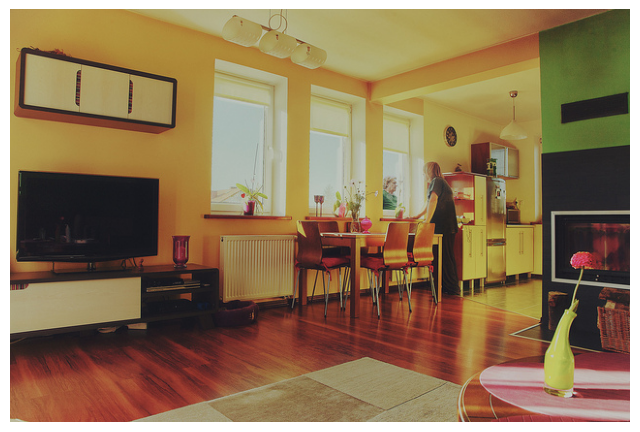

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

test_image = cv2.cvtColor(cv2.imread('/content/data/val2017/000000000139.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(test_image)
plt.axis('off')

In [40]:
test_image.shape

(426, 640, 3)

In [25]:
result.keys()

dict_keys(['detection_anchor_indices', 'detection_multiclass_scores', 'detection_scores', 'raw_detection_boxes', 'num_detections', 'raw_detection_scores', 'detection_classes', 'detection_boxes'])

In [26]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [52]:
def draw_inference_image(model, img, THR_Score=0.5):
  draw_image = img.copy()
  bbox_color = (0, 255, 0)
  text_color = (0, 0, 255)
  height, width = draw_image.shape[:2]

  img = img[np.newaxis, :, :, :]
  results = model(img)
  result = {name : k[0].numpy() for name, k in results.items()}

  for idx in range(100):
    inference_score = result['detection_scores'][idx]
    class_id = result['detection_classes'][idx]

    if inference_score < THR_Score:
      break

    x1 = int(result['detection_boxes'][idx][1] * width)
    y1 = int(result['detection_boxes'][idx][0] * height)
    x2 = int(result['detection_boxes'][idx][3] * width)
    y2 = int(result['detection_boxes'][idx][2] * height)

    caption = "{} : {:.4f}".format(labels_to_names[class_id], inference_score)
    cv2.rectangle(draw_image, (x1, y1), (x2, y2), color=bbox_color, thickness=2)
    cv2.putText(draw_image, caption, (x1, y1-5), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=text_color, thickness=1)

  draw_image = cv2.cvtColor(draw_image, cv2.COLOR_BGR2RGB)
  return draw_image

In [61]:
img = cv2.imread('/content/data/val2017/000000000139.jpg')
inference_image = draw_inference_image(ssd_model, img)

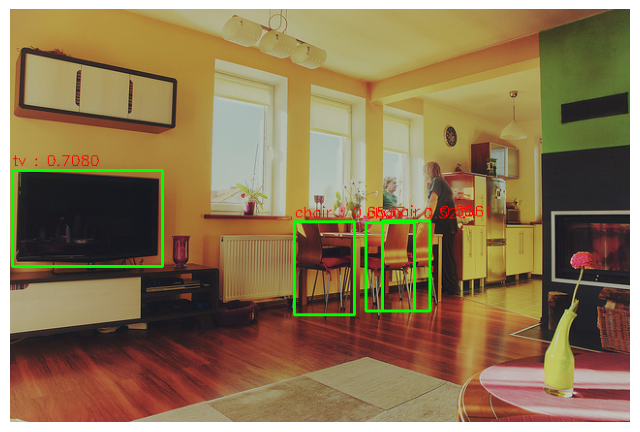

In [62]:
# person을 예측하지 못함.
# thrscore를 0.5 미만으로 내리면 이상한 부분까지 예측을 해버리므로 의미가 없음

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(inference_image)

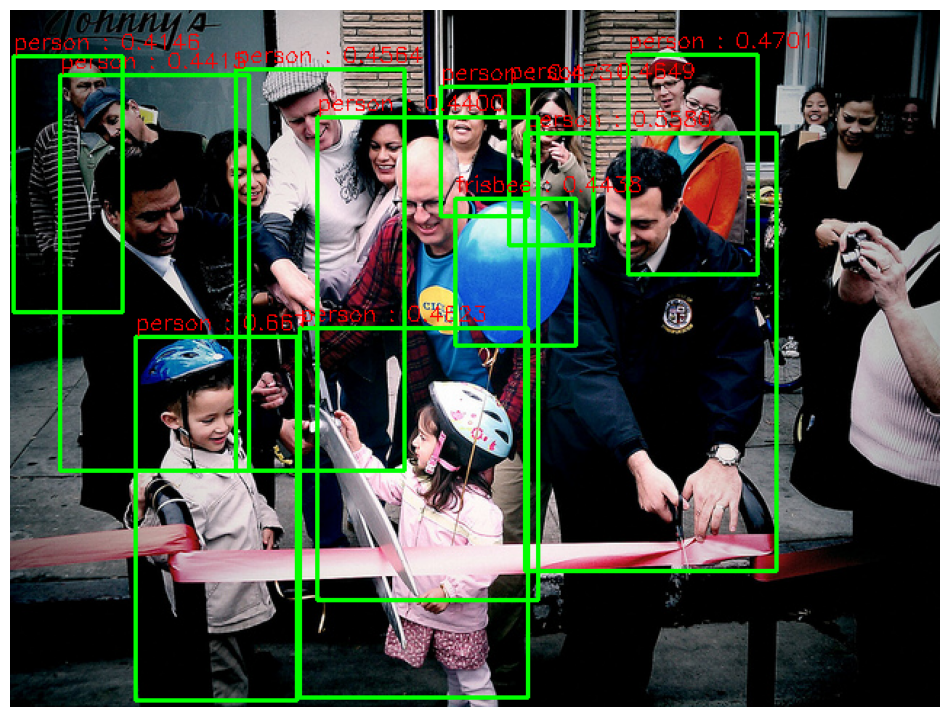

In [67]:
new_image_path = '/content/data/val2017/000000005001.jpg'
new_image = cv2.imread(new_image_path)
new_inference_image = draw_inference_image(ssd_model, new_image, THR_Score=0.4)

plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(new_inference_image)

In [ ]:
'''
tensorflow hub를 이용해 model을 불러와서 inference해봤는데 성능이 그렇게 뛰어나진 않다.
두가지 Image에 대해 test를 해봤는데 성능이 좋진 못한 것 같다.
tensorflow hub에서 model을 load하고 inference하는 과정은 굉장히 간단했다.
hub.load로 tensorflow model로 가져오고 그 객체의 인자에 image를 넣어주면 된다.
다만 주의할 점은 bbox(bounding box) 좌표는 정규화 되어있다는 점, result의 value값이 tensor라는 점, model의 Input으로는 4차원 tensor or numpy가 들어가야 한다는 점을 감안해서 진행시켜야 한다.
여기서 나는 tensor to numpy를 했다.
tensor로 Input할 때는 'dtype = uint8'해야함을 주의하자.
'''